In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, models, optimizers, callbacks
import numpy as np
from sklearn.model_selection import KFold, train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.layers import Conv2D, Dense, BatchNormalization, Activation, Dropout, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import ModelCheckpoint, CSVLogger, TensorBoard, EarlyStopping
from tensorflow.keras.utils import plot_model

import warnings
warnings.filterwarnings('ignore', category=Warning)


In [ ]:
import os

# Specify the folder path
folder_path = "/content/drive/MyDrive/data/"

# Error handling: Check if folder exists
if not os.path.exists(folder_path):
    raise ValueError(f"Folder '{folder_path}' does not exist. Please provide a valid path.")

# Create an empty list to store the files (optional)
trials = []

# Iterate through files in the folder using os.listdir()
for filename in os.listdir(folder_path):
    # Check if it's a file (not a directory) using os.path.isfile()
    if os.path.isfile(os.path.join(folder_path, filename)):
        # Construct the full path to the file
        full_path = os.path.join(folder_path, filename)

        data = pd.read_csv(full_path, header=None)

        # Process the data (replace with your specific operations)
        print(f"Processing file: {filename}")
        # ... your data processing logic here ...

        # Optionally, add the file to the list (if needed)
        trials.append(data)

Processing file: ss_0_1.csv
Processing file: ss_0_2.csv
Processing file: ss_0_3.csv
Processing file: ss_0_4.csv
Processing file: ss_0_5.csv
Processing file: ss_0_6.csv
Processing file: ss_0_7.csv
Processing file: ss_0_8.csv
Processing file: ss_0_9.csv
Processing file: ss_0_10.csv
Processing file: ss_0_11.csv
Processing file: ss_0_12.csv
Processing file: ss_0_13.csv
Processing file: ss_1_1.csv
Processing file: ss_0_15.csv
Processing file: ss_0_14.csv
Processing file: ss_1_2.csv
Processing file: ss_1_3.csv
Processing file: ss_1_4.csv
Processing file: ss_1_5.csv
Processing file: ss_1_6.csv
Processing file: ss_1_8.csv
Processing file: ss_1_7.csv
Processing file: ss_1_9.csv
Processing file: ss_1_10.csv
Processing file: ss_1_11.csv
Processing file: ss_1_12.csv
Processing file: ss_1_13.csv
Processing file: ss_2_4.csv
Processing file: ss_2_1.csv
Processing file: ss_2_5.csv
Processing file: ss_1_15.csv
Processing file: ss_1_14.csv
Processing file: ss_2_2.csv
Processing file: ss_2_6.csv
Processi

In [ ]:
#Zero-Padding applied
import numpy as np


max_samples = max(trial.shape[1] for trial in trials)

sample = np.zeros((len(trials), 62, max_samples))

for i, trial in enumerate(trials):
  padding_length = max_samples - trial.shape[1]
  sample[i, :, :] = np.pad(trial, ((0, 0), (0, padding_length)), mode='constant', constant_values=0)

print(sample.shape)


(240, 62, 59400)


In [ ]:

labels = ["Happy", "Fear", "Neutral", "Sad", "Disgust",
          "Happy", "Fear", "Neutral", "Sad", "Disgust",
          "Happy", "Fear", "Neutral", "Sad", "Disgust"]*16


print(labels)


['Happy', 'Fear', 'Neutral', 'Sad', 'Disgust', 'Happy', 'Fear', 'Neutral', 'Sad', 'Disgust', 'Happy', 'Fear', 'Neutral', 'Sad', 'Disgust', 'Happy', 'Fear', 'Neutral', 'Sad', 'Disgust', 'Happy', 'Fear', 'Neutral', 'Sad', 'Disgust', 'Happy', 'Fear', 'Neutral', 'Sad', 'Disgust', 'Happy', 'Fear', 'Neutral', 'Sad', 'Disgust', 'Happy', 'Fear', 'Neutral', 'Sad', 'Disgust', 'Happy', 'Fear', 'Neutral', 'Sad', 'Disgust', 'Happy', 'Fear', 'Neutral', 'Sad', 'Disgust', 'Happy', 'Fear', 'Neutral', 'Sad', 'Disgust', 'Happy', 'Fear', 'Neutral', 'Sad', 'Disgust', 'Happy', 'Fear', 'Neutral', 'Sad', 'Disgust', 'Happy', 'Fear', 'Neutral', 'Sad', 'Disgust', 'Happy', 'Fear', 'Neutral', 'Sad', 'Disgust', 'Happy', 'Fear', 'Neutral', 'Sad', 'Disgust', 'Happy', 'Fear', 'Neutral', 'Sad', 'Disgust', 'Happy', 'Fear', 'Neutral', 'Sad', 'Disgust', 'Happy', 'Fear', 'Neutral', 'Sad', 'Disgust', 'Happy', 'Fear', 'Neutral', 'Sad', 'Disgust', 'Happy', 'Fear', 'Neutral', 'Sad', 'Disgust', 'Happy', 'Fear', 'Neutral', 'Sad'

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(sample, labels, test_size=.2, random_state=42)

# KFold cross-validation loop
kfold = KFold(n_splits=10, shuffle=True, random_state=42)
cvscores = []  # To store evaluation metrics (e.g., accuracy)

for train_index, val_index in kfold.split(X_train):
  # Split the training data further for train and validation sets within each fold
  X_train_fold = [X_train[i] for i in train_index]
  X_val_fold = [X_train[i] for i in val_index]
  y_train_fold = [y_train[i] for i in train_index]
  y_val_fold = [y_train[i] for i in val_index]


X_train_fold = np.array(X_train_fold)
X_val_fold = np.array(X_val_fold)
y_train_fold = np.array(y_train_fold)
y_val_fold = np.array(y_val_fold)


In [ ]:
#Scaling
scaler = StandardScaler()
for x in X_train_fold:
  scaler.fit(x[:, 1:])

X_train_fold_scaled = []
for x in X_train_fold:
  X_train_fold_scaled.append(scaler.transform(x[:, 1:]))
X_train_fold_scaled = np.array(X_train_fold_scaled)

X_te = []
for x in X_test:
  X_te.append(scaler.transform(x[:, 1:]))
x_test = np.array(X_te)

X_val = []
for x in X_val_fold:
  X_val.append(scaler.transform(x[:, 1:]))
X_val_fold = np.array(X_val)





In [ ]:
print(X_train_fold_scaled.shape)
print(X_val_fold.shape)
print(x_test.shape)

(173, 62, 59399)
(19, 62, 59399)
(48, 62, 59399)


In [ ]:
#One Hot Encoding of the labels
encoder = OneHotEncoder(sparse=False)
encoder.fit(np.array(y_train_fold).reshape(-1, 1))
y_train_fold_encoded = encoder.transform(np.array(y_train_fold).reshape(-1, 1))
y_test = encoder.transform(np.array(y_test).reshape(-1, 1))
y_val_fold = encoder.transform(np.array(y_val_fold).reshape(-1, 1))

In [ ]:
print(y_train_fold_encoded.shape)
print(y_test.shape)
print(y_val_fold.shape)

(173, 5)
(48, 5)
(19, 5)


In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(64,return_sequences=True, input_shape=(X_train_fold_scaled.shape[1],X_train_fold_scaled.shape[2])),
    tf.keras.layers.LSTM(64),

    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(128, activation = tf.nn.relu),
    tf.keras.layers.Dense(5, activation = tf.nn.softmax)
])


In [ ]:
model2 = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(64,return_sequences=True, input_shape=(X_train_fold_scaled.shape[1],X_train_fold_scaled.shape[2])),
    tf.keras.layers.LSTM(64,return_sequences=True),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation = tf.nn.relu),
    tf.keras.layers.Dense(128, activation = tf.nn.relu),
    tf.keras.layers.Dense(5, activation = tf.nn.softmax)
])


In [ ]:
optimizer = optimizers.Adam()
model.compile(loss="categorical_crossentropy", optimizer=optimizer,metrics=['acc',tf.keras.metrics.Recall(),tf.keras.metrics.AUC(),tf.keras.metrics.Precision()])

In [ ]:
optimizer = optimizers.Adam()
model2.compile(loss="categorical_crossentropy", optimizer=optimizer,metrics=['acc',tf.keras.metrics.Recall(),tf.keras.metrics.AUC(),tf.keras.metrics.Precision()])

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_10 (LSTM)              (None, 62, 64)            15222784  
                                                                 
 lstm_11 (LSTM)              (None, 64)                33024     
                                                                 
 batch_normalization_4 (Bat  (None, 64)                256       
 chNormalization)                                                
                                                                 
 dropout_4 (Dropout)         (None, 64)                0         
                                                                 
 flatten_4 (Flatten)         (None, 64)                0         
                                                                 
 dense_10 (Dense)            (None, 128)               8320      
                                                      

In [ ]:
model2.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_12 (LSTM)              (None, 62, 64)            15222784  
                                                                 
 lstm_13 (LSTM)              (None, 62, 64)            33024     
                                                                 
 lstm_14 (LSTM)              (None, 64)                33024     
                                                                 
 batch_normalization_5 (Bat  (None, 64)                256       
 chNormalization)                                                
                                                                 
 dropout_5 (Dropout)         (None, 64)                0         
                                                                 
 flatten_5 (Flatten)         (None, 64)                0         
                                                      

In [ ]:
tf.keras.utils.plot_model(model,show_shapes = True, to_file='model.png')

In [ ]:
tf.keras.utils.plot_model(model2,show_shapes = True, to_file='model.png')

In [ ]:
checkpoint = callbacks.ModelCheckpoint('LSTM_padmodel_detect_emotional.h5', save_best_only=True, verbose=1, monitor='val_loss')
early_stopping = callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=10, min_delta=0.00001, verbose=1)
csv_logger = callbacks.CSVLogger('training.log')
callbacks_list = [checkpoint, reduce_lr, csv_logger, early_stopping]

In [ ]:
checkpoint2 = callbacks.ModelCheckpoint('LSTM _padmodel_detect_emotional2.h5', save_best_only=True, verbose=1, monitor='val_loss')
early_stopping2 = callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr2 = callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=10, min_delta=0.00001, verbose=1)
csv_logger2 = callbacks.CSVLogger('training.log')
callbacks_list2 = [checkpoint2, reduce_lr2, csv_logger2, early_stopping2]

In [ ]:
#Zero Padding Model 1
history =   model.fit(X_train_fold_scaled, y_train_fold_encoded, epochs=50, validation_data=(X_val_fold, y_val_fold),callbacks=callbacks_list).history

Epoch 1/50
6/6 [==============================] - ETA: 0s - loss: 1.6763 - acc: 0.2717 - recall_3: 0.0636 - auc_3: 0.5784 - precision_3: 0.3667
Epoch 1: val_loss improved from inf to 1.53157, saving model to RNN_padmodel_detect_emotional.h5
6/6 [==============================] - 13s 2s/step - loss: 1.6763 - acc: 0.2717 - recall_3: 0.0636 - auc_3: 0.5784 - precision_3: 0.3667 - val_loss: 1.5316 - val_acc: 0.4737 - val_recall_3: 0.0000e+00 - val_auc_3: 0.7306 - val_precision_3: 0.0000e+00 - lr: 0.0010
Epoch 2/50
6/6 [==============================] - ETA: 0s - loss: 0.9597 - acc: 0.7168 - recall_3: 0.3468 - auc_3: 0.9067 - precision_3: 0.8571
Epoch 2: val_loss improved from 1.53157 to 1.49109, saving model to RNN_padmodel_detect_emotional.h5
6/6 [==============================] - 7s 1s/step - loss: 0.9597 - acc: 0.7168 - recall_3: 0.3468 - auc_3: 0.9067 - precision_3: 0.8571 - val_loss: 1.4911 - val_acc: 0.3684 - val_recall_3: 0.0000e+00 - val_auc_3: 0.7735 - val_precision_3: 0.0000e+00 

In [ ]:
  loss, fold_accuracy,a,a2,a1 = model.evaluate(X_val_fold, y_val_fold)
  cvscores.append(fold_accuracy)

# Print the average accuracy across all folds
print(f"K-Fold Cross-Validation Accuracy: {np.mean(cvscores)}")

1/1 [==============================] - 0s 483ms/step - loss: 0.8695 - acc: 0.7368 - recall_3: 0.7368 - auc_3: 0.8992 - precision_3: 0.7778
K-Fold Cross-Validation Accuracy: 0.6973684281110764


In [ ]:
#Zero Padding Model 2
history2 =   model2.fit(X_train_fold_scaled, y_train_fold_encoded, epochs=50, validation_data=(X_val_fold, y_val_fold),callbacks=callbacks_list2).history

Epoch 1/50
6/6 [==============================] - ETA: 0s - loss: 1.6396 - acc: 0.3121 - recall_4: 0.0058 - auc_4: 0.5662 - precision_4: 0.2000
Epoch 1: val_loss improved from inf to 1.56999, saving model to RNN _padmodel_detect_emotional2.h5
6/6 [==============================] - 14s 2s/step - loss: 1.6396 - acc: 0.3121 - recall_4: 0.0058 - auc_4: 0.5662 - precision_4: 0.2000 - val_loss: 1.5700 - val_acc: 0.4211 - val_recall_4: 0.0000e+00 - val_auc_4: 0.7008 - val_precision_4: 0.0000e+00 - lr: 0.0010
Epoch 2/50
6/6 [==============================] - ETA: 0s - loss: 1.2093 - acc: 0.6474 - recall_4: 0.1387 - auc_4: 0.8490 - precision_4: 0.9600
Epoch 2: val_loss improved from 1.56999 to 1.49847, saving model to RNN _padmodel_detect_emotional2.h5
6/6 [==============================] - 7s 1s/step - loss: 1.2093 - acc: 0.6474 - recall_4: 0.1387 - auc_4: 0.8490 - precision_4: 0.9600 - val_loss: 1.4985 - val_acc: 0.5789 - val_recall_4: 0.0000e+00 - val_auc_4: 0.8269 - val_precision_4: 0.0000e

In [ ]:
  loss1, fold_accuracy,a1,a12,a11 = model2.evaluate(X_val_fold, y_val_fold)
  cvscores.append(fold_accuracy)

# Print the average accuracy across all folds
print(f"K-Fold Cross-Validation Accuracy: {np.mean(cvscores)}")

1/1 [==============================] - 1s 503ms/step - loss: 0.5303 - acc: 0.7895 - recall_4: 0.7368 - auc_4: 0.9675 - precision_4: 0.8750
K-Fold Cross-Validation Accuracy: 0.7280701895554861


In [ ]:
loss,acc,rec,auc,pre=model.evaluate(x_test, y_test)
loss2,acc2,rec2,auc2,pre2=model2.evaluate(x_test, y_test)

2/2 [==============================] - 1s 328ms/step - loss: 0.8827 - acc: 0.7292 - recall_4: 0.6875 - auc_4: 0.9074 - precision_4: 0.7500


In [ ]:
#Zero Padding Model 1 classification_report

from sklearn.metrics import classification_report
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
# Generate classification report
report = classification_report(y_test.argmax(axis=1), y_pred_classes, output_dict=True)  # Convert one-hot labels to class labels

# Print the classification report
print("Classification Report:")
print(classification_report(y_test.argmax(axis=1), y_pred_classes))

precision = report['accuracy']  # Overall accuracy
recall = report['weighted avg']['recall']  # Average recall
f1_score = report['weighted avg']['f1-score']  # Average F1-score

print(f"Overall Accuracy: {precision}")
print(f"Average Recall: {recall}")
print(f"Average F1-Score: {f1_score}")

2/2 [==============================] - 2s 340ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.80      1.00      0.89         8
           1       1.00      0.70      0.82        10
           2       0.50      0.62      0.55        13
           3       0.75      0.75      0.75         8
           4       0.71      0.56      0.63         9

    accuracy                           0.71        48
   macro avg       0.75      0.72      0.73        48
weighted avg       0.74      0.71      0.71        48

Overall Accuracy: 0.7083333333333334
Average Recall: 0.7083333333333334
Average F1-Score: 0.7113295629554504


In [ ]:
#Zero Padding Model 2 classification_report

y_pred1 = model2.predict(x_test)
y_pred_classes = np.argmax(y_pred1, axis=1)
# Generate classification report
report = classification_report(y_test.argmax(axis=1), y_pred_classes, output_dict=True)  # Convert one-hot labels to class labels

# Print the classification report
print("Classification Report:")
print(classification_report(y_test.argmax(axis=1), y_pred_classes))

precision = report['accuracy']  # Overall accuracy
recall = report['weighted avg']['recall']  # Average recall
f1_score = report['weighted avg']['f1-score']  # Average F1-score

print(f"Overall Accuracy: {precision}")
print(f"Average Recall: {recall}")
print(f"Average F1-Score: {f1_score}")

2/2 [==============================] - 2s 327ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.73      1.00      0.84         8
           1       1.00      0.60      0.75        10
           2       0.67      0.62      0.64        13
           3       0.60      0.75      0.67         8
           4       0.78      0.78      0.78         9

    accuracy                           0.73        48
   macro avg       0.75      0.75      0.74        48
weighted avg       0.76      0.73      0.73        48

Overall Accuracy: 0.7291666666666666
Average Recall: 0.7291666666666666
Average F1-Score: 0.7268786549707601


In [ ]:
#Zero Padding metrics Model 1 Model2
print("accuracy:",acc,"  ,",acc2)
print("precision:",pre,"  ,",pre2)
print("recall:",rec,"  ,",rec2)
print("Area under Curve:",auc,"  ,",auc2)
f1 = 2*(pre*rec)/(pre+rec)
f2 = 2*(pre2*rec2)/(pre2+rec2)
print("f1 score:",f1,"  ,",f2)

accuracy: 0.7083333134651184   , 0.7291666865348816
precision: 0.7441860437393188   , 0.75
recall: 0.6666666865348816   , 0.6875
Area under Curve: 0.8997396230697632   , 0.907443642616272
f1 score: 0.7032967131144467   , 0.717391304347826


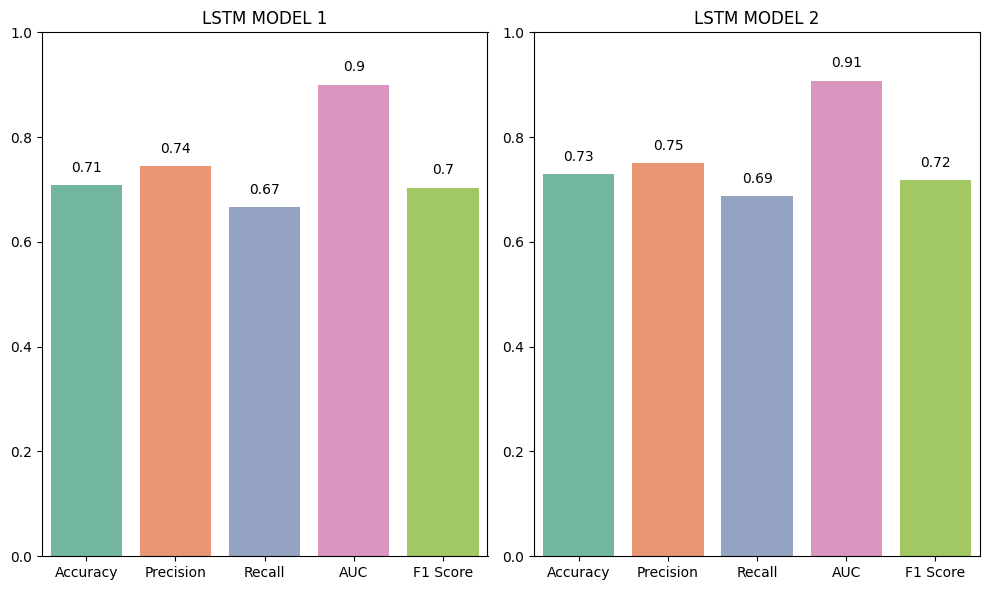

In [ ]:

import matplotlib.pyplot as plt
import seaborn as sns

models = ['Accuracy','Precision','Recall','AUC','F1 Score']

accuracy_values = [acc,pre,rec,auc,f1]
accuracy_values2 = [acc2,pre2,rec2,auc2,f2 ]


# Plotting
plt.figure(figsize=(10, 6))

# Plot accuracy
plt.subplot(1, 2, 1)
sns.barplot(x=models, y=accuracy_values, palette='Set2')
plt.title('LSTM MODEL 1')
plt.ylim(0, 1)

# Add text labels for accuracy values
for i, v in enumerate(accuracy_values):
    plt.text(i, v + 0.02, str(round(v, 2)), ha='center', va='bottom')

# Plot precision
plt.subplot(1, 2, 2)
sns.barplot(x=models, y=accuracy_values2, palette='Set2')
plt.title('LSTM MODEL 2')
plt.ylim(0, 1)

# Add text labels for precision values
for i, v in enumerate(accuracy_values2):
    plt.text(i, v + 0.02, str(round(v, 2)), ha='center', va='bottom')

plt.tight_layout()
plt.show()

2/2 [==============================] - 1s 324ms/step


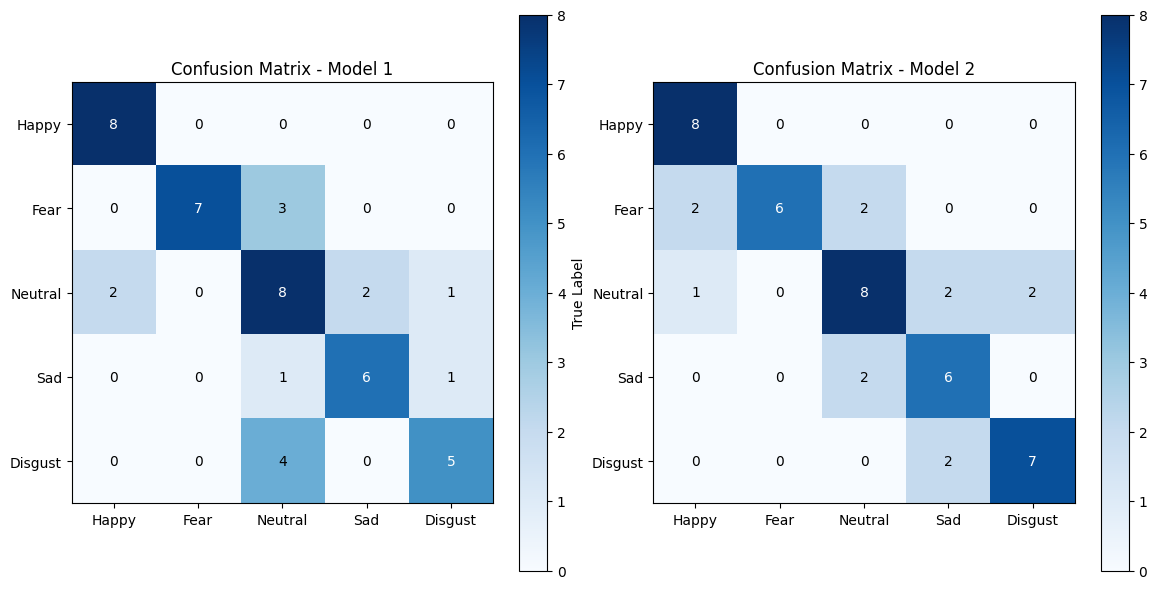

In [ ]:
import matplotlib.pyplot as plt

def plot_confusion_matrix(cm, labels, title):

  labels = ["Happy", "Fear", "Neutral", "Sad", "Disgust"]

  plt.figure(figsize=(12, 6))  # Adjust figure size as needed

  # Plot confusion matrix for model 1 on the left
  plt.subplot(1, 2, 1)
  plt.imshow(cm1, interpolation='nearest', cmap='Blues')
  plt.title("Confusion Matrix - Model 1")
  plt.colorbar()
  tick_marks = np.arange(len(labels))
  plt.xticks(tick_marks, labels)
  plt.yticks(tick_marks, labels)

  # Normalize confusion matrix values to display percentages instead of raw counts

  thresh = cm1.max() / 2.
  for i in range(len(cm1)):
    for j in range(len(cm1[0])):
      plt.text(j, i, format(cm1[i, j]),  # Display percentages with 2 decimal places
               ha="center", va="center",
               color="white" if cm1[i, j] > thresh else "black")

  # Plot confusion matrix for model 2 on the right
  plt.subplot(1, 2, 2)
  plt.imshow(cm2, interpolation='nearest', cmap='Blues')
  plt.title("Confusion Matrix - Model 2")
  plt.colorbar()
  tick_marks = np.arange(len(labels))
  plt.xticks(tick_marks, labels)
  plt.yticks(tick_marks, labels)

  # Normalize confusion matrix values to display percentages (similar to model 1)

  thresh = cm2.max() / 2.
  for i in range(len(cm2)):
    for j in range(len(cm2[0])):
      plt.text(j, i, format(cm2[i, j]),
               ha="center", va="center",
               color="white" if cm2[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True Label')
  plt.show()

# Calculate confusion matrices
y_pred1 = model.predict(x_test)
y_pred_classes1 = np.argmax(y_pred1, axis=1)
cm1 = confusion_matrix(y_test.argmax(axis=1), y_pred_classes1)

y_pred2 = model2.predict(x_test)
y_pred_classes2 = np.argmax(y_pred2, axis=1)
cm2 = confusion_matrix(y_test.argmax(axis=1), y_pred_classes2)

# Create the side-by-side confusion matrix plot
plot_confusion_matrix(cm1, list(set(y_test.argmax(axis=1))), cm2)
